In [1]:
#Imports
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Reading in tables
dataset_dir = "C:\\Users\\nachi\\OneDrive\\Desktop\\Hawkins Lab\\datasets"
current_dataset_name = "HETVIPS_LAMOST"
current_dataset = Table.read(os.path.join(dataset_dir,current_dataset_name))
star_mask =np.where(current_dataset["classification"] == "STAR")
current_dataset = current_dataset[star_mask]
print(current_dataset.colnames)

['objID', 'RA', 'Dec', 'shotid', 'gmag', 'rmag', 'imag', 'zmag', 'ymag', 'sn', 'barycor', 'mjd', 'exptime', 'chi2_star', 'chi2_galaxy', 'chi2_qso', 'z_star', 'z_galaxy', 'z_qso', 'z_best', 'classification', 'stellartype', 'SPECID_1', 'RA_1', 'DEC_1', 'SNR_U', 'SNR_G', 'SNR_R', 'SNR_I', 'SNR_Z', 'RV', 'RV_ERR', 'TEFF', 'TEFF_ERR', 'TEFF_FLAG', 'TEFF_GRADCORR', 'LOGG', 'LOGG_ERR', 'LOGG_FLAG', 'LOGG_GRADCORR', 'VMIC', 'VMIC_ERR', 'VMIC_FLAG', 'VMIC_GRADCORR', 'FEH', 'FEH_ERR', 'FEH_FLAG', 'FEH_GRADCORR', 'ALPHA_FE', 'ALPHA_FE_ERR', 'C_FE', 'C_FE_ERR', 'C_FE_FLAG', 'C_FE_GRADCORR', 'N_FE', 'N_FE_ERR', 'N_FE_FLAG', 'N_FE_GRADCORR', 'O_FE', 'O_FE_ERR', 'O_FE_FLAG', 'O_FE_GRADCORR', 'NA_FE', 'NA_FE_ERR', 'NA_FE_FLAG', 'NA_FE_GRADCORR', 'MG_FE', 'MG_FE_ERR', 'MG_FE_FLAG', 'MG_FE_GRADCORR', 'AL_FE', 'AL_FE_ERR', 'AL_FE_FLAG', 'AL_FE_GRADCORR', 'SI_FE', 'SI_FE_ERR', 'SI_FE_FLAG', 'SI_FE_GRADCORR', 'CA_FE', 'CA_FE_ERR', 'CA_FE_FLAG', 'CA_FE_GRADCORR', 'TI_FE', 'TI_FE_ERR', 'TI_FE_FLAG', 'TI_FE_G

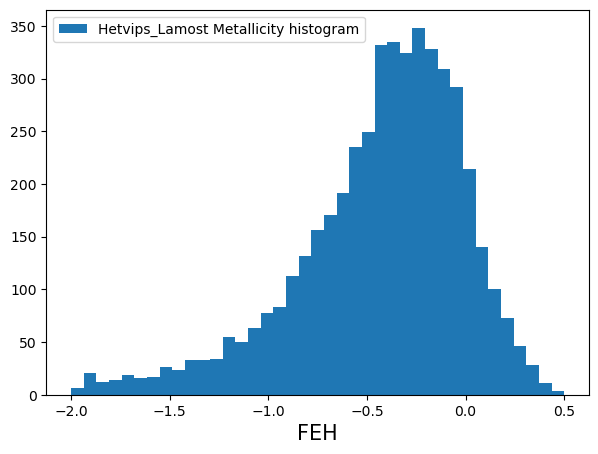

In [3]:
fig1 = plt.figure(figsize=(7,5))
FE_H_name = "FEH"
plt.hist(current_dataset[FE_H_name], bins=np.linspace(-2,0.5,40),label=f"{current_dataset_name.title()} Metallicity histogram")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel(FE_H_name,fontsize=15)
plt.legend()
plt.show()

c:\Users\nachi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nachi\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


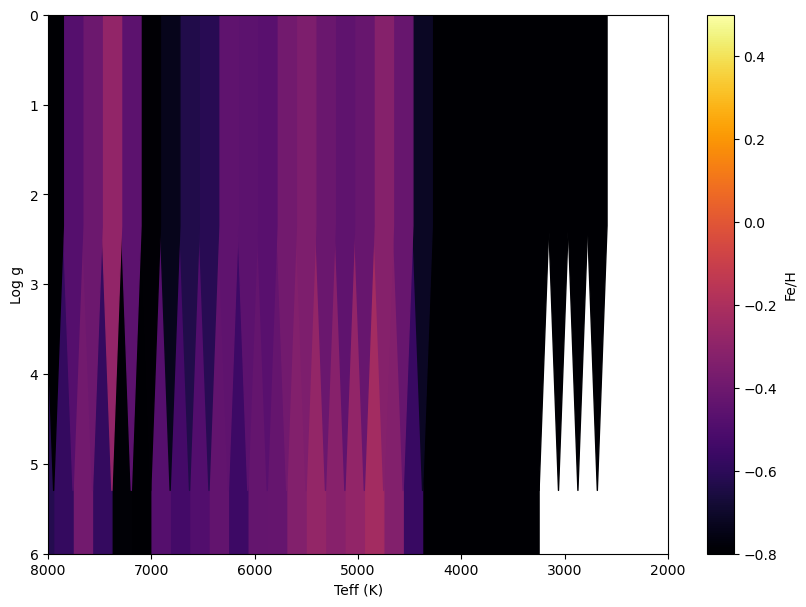

In [4]:
fig2 = plt.figure(figsize=(10,7))
cmap = plt.cm.inferno
hb = plt.hexbin(current_dataset["TEFF"],current_dataset["LOGG"], gridsize=100, C=current_dataset[FE_H_name],cmap=cmap,vmin=-0.8,vmax=0.5)
plt.colorbar(hb,label="Fe/H")
plt.xlabel("Teff (K)")
plt.ylabel("Log g")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(2000,8000)
plt.ylim(0,6)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

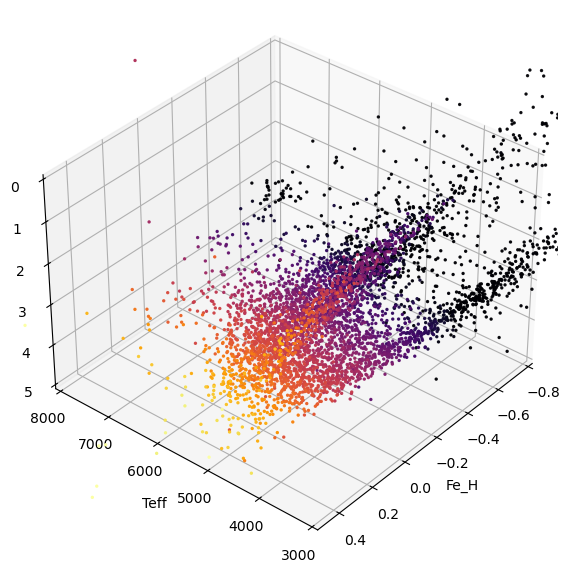

In [8]:
logg_axis=current_dataset["LOGG"]
teff_axis=current_dataset["TEFF"]
feh_axis=current_dataset["FEH"]

cmap = plt.cm.inferno
plot3d = plt.figure(figsize=(25,7))
ax = plot3d.add_subplot(111,projection='3d')
ax.scatter(feh_axis,teff_axis,logg_axis,cmap=cmap,c=feh_axis,vmax=0.5,vmin=-0.8,s=2)
ax.set_xlabel('Fe_H')
ax.set_ylabel('Teff')
ax.set_zlabel('Log g')
ax.set_ylim(3000,8000)
ax.set_xlim(0.5,-0.8)
ax.set_zlim(0,5)
ax.invert_zaxis()

#ax.view_init(elev=20., azim=-35, roll=0)
ax.view_init(35, 220)
plt.show()